<a href="https://www.kaggle.com/shalhamucha18/predict-house-prices?scriptVersionId=86238676" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/train-data/housing_prices.csv


Let's load the data set

In [2]:
columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
house_df=pd.read_csv('/kaggle/input/train-data/housing_prices.csv',names=columns,header=None,delimiter=r"\s+")
house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
#check the data type each column
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
#fint the missing value
house_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
#finding the shape 
house_df.shape

(506, 14)

Finding statistical information for the house data

In [6]:
house_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Lets examine the outliers of the data

In [7]:
for u ,v in house_df.items():
    q1=v.quantile(0.25)
    q2=v.quantile(0.75)
    diff=q2-q1
    lower_t=q1-(1.5*diff)
    upper_t=q2-(1.5*diff)
    v_col = v[(v < lower_t) | (v > upper_t)]
    perc = np.shape(v_col)[0] *100.0 / np.shape(house_df)[0]
    print("Column %s outliers = %.2f%%" %(u,perc))
    

Column CRIM outliers = 100.00%
Column ZN outliers = 100.00%
Column INDUS outliers = 100.00%
Column CHAS outliers = 6.92%
Column NOX outliers = 100.00%
Column RM outliers = 93.28%
Column AGE outliers = 93.08%
Column DIS outliers = 100.00%
Column RAD outliers = 100.00%
Column TAX outliers = 100.00%
Column PTRATIO outliers = 87.15%
Column B outliers = 94.86%
Column LSTAT outliers = 99.60%
Column MEDV outliers = 89.92%


Let's visualize the data

In [8]:
import seaborn as sns
import matplotlib.pyplot  as plt
import matplotlib
import plotly.express as px
%matplotlib inline


<AxesSubplot:ylabel='MEDV'>

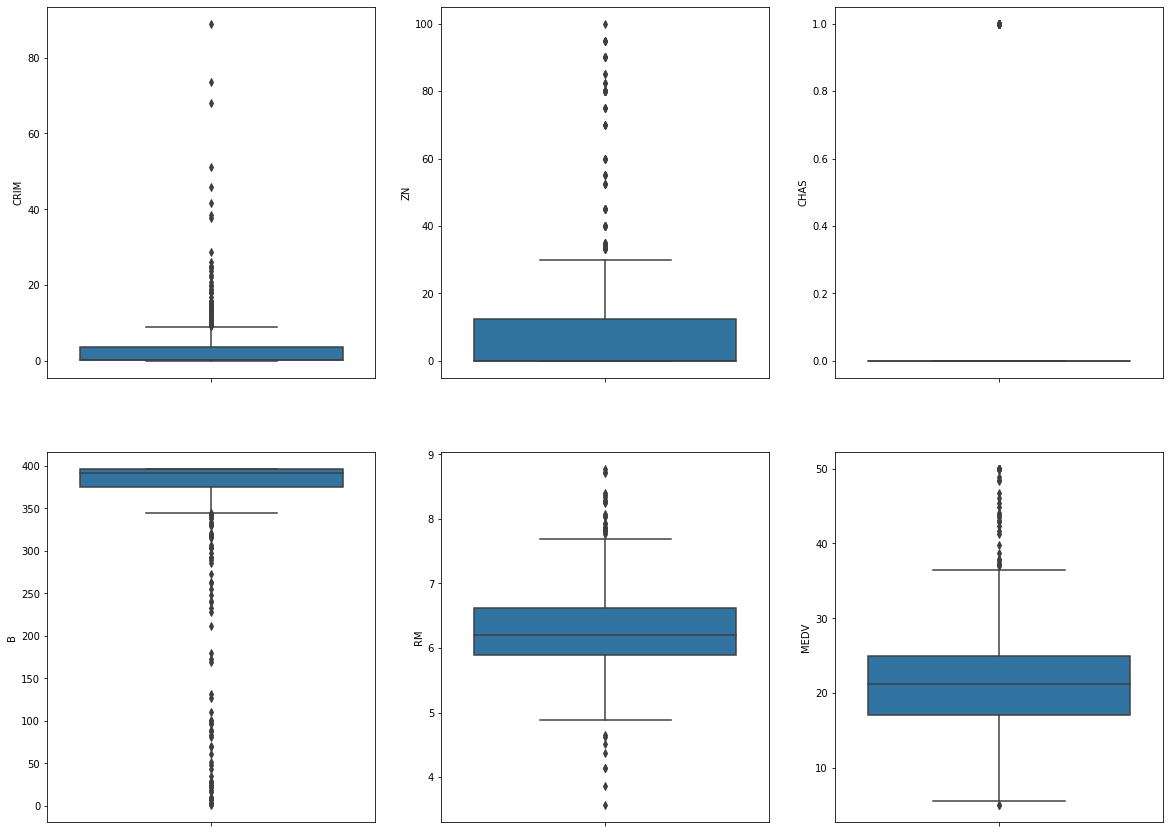

In [9]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(nrows=2,ncols=3,figsize=(20,15))
sns.boxplot(y='CRIM',data=house_df,ax=ax1)
sns.boxplot(y='ZN',data=house_df,ax=ax2)
sns.boxplot(y='CHAS',data=house_df,ax=ax3)
sns.boxplot(y='B',data=house_df,ax=ax4)
sns.boxplot(y='RM',data=house_df,ax=ax5)
sns.boxplot(y='MEDV',data=house_df,ax=ax6)

Let's examine MEDV data

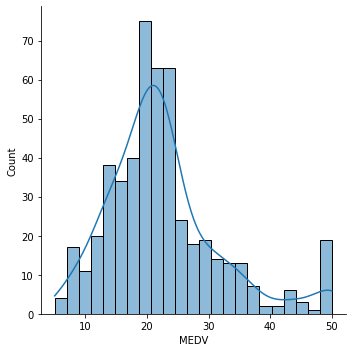

In [10]:
sns.displot(house_df['MEDV'],kde=True)

Let's remove maximum value of MEDV

In [11]:
house_df=house_df[~(house_df['MEDV']>=50)]


In [12]:
house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [13]:
fig=px.scatter(house_df,x="RM",y="MEDV",trendline='ols',title='No of rooms vs House prices')
fig.update_traces(marker_size=7)
fig.show()

In [14]:
fig=px.scatter(house_df,x="AGE",y="MEDV",trendline='ols',color="CHAS",title='No of rooms vs House prices')
fig.update_traces(marker_size=7)
fig.show()

In [15]:
fig=px.scatter(house_df,x="LSTAT",y="MEDV",trendline='ols',title='Lower status of the population vs House prices')
fig.update_traces(marker_size=7)
fig.show()

ploting correlation on data using heatmap matrix

Text(0.5, 1.0, 'Correlation Matrix')

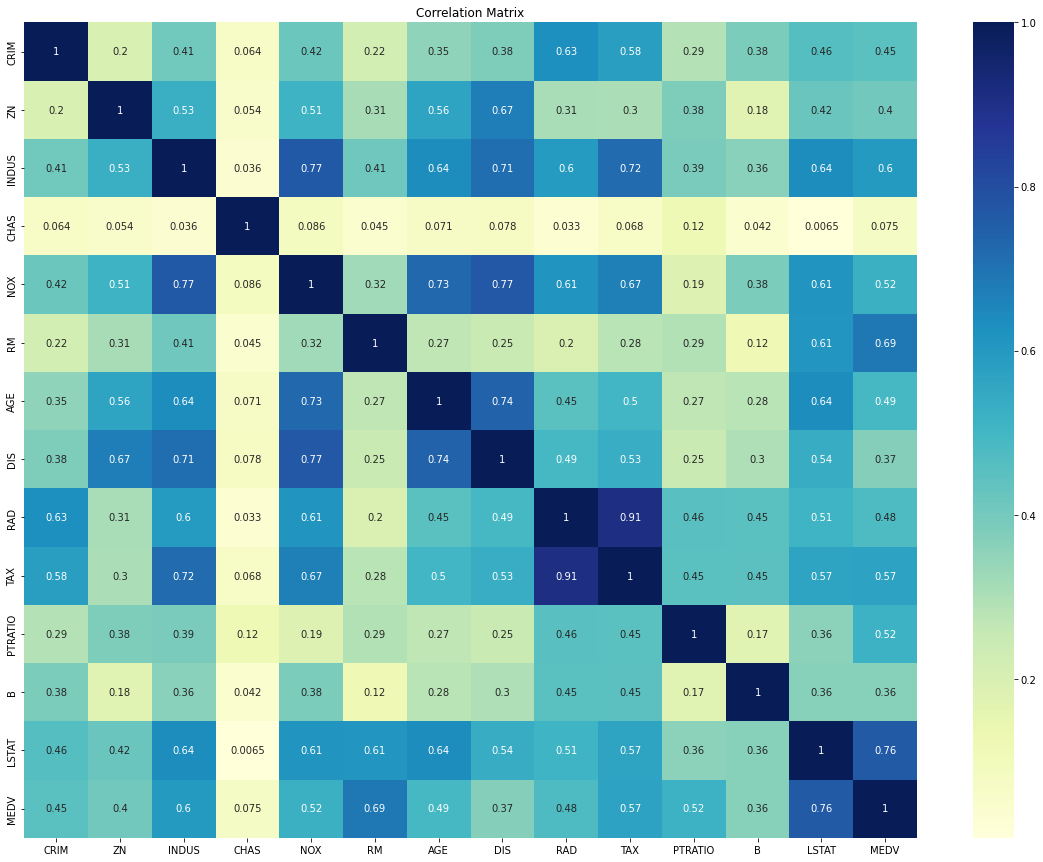

In [16]:
plt.figure(figsize=(20,15))
sns.heatmap(house_df.corr().abs(),annot=True, cmap="YlGnBu")
plt.title('Correlation Matrix')

traing a model

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [18]:
#defineing our input and target variable
inputs=house_df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
target=house_df['MEDV']


In [19]:
#lets split our data as train and test data
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2,random_state=5)

In [20]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(392, 13) (98, 13) (392,) (98,)


In [21]:
#create and train model
l_model=LinearRegression()
l_model.fit(x_train,y_train)
#generate predictions
lin_test_pre=l_model.predict(x_test)
#evalute the model
print("R2 Score:",r2_score(y_test,lin_test_pre))
print("Mean Absolute Eror",mean_absolute_error(y_test,lin_test_pre))
print("Man Suared Eror",mean_squared_error(y_test,lin_test_pre))

R2 Score: 0.8057832692732418
Mean Absolute Eror 2.696619229622098
Man Suared Eror 13.230005072163438


train model with decision tree Regression

In [22]:
r_model= DecisionTreeRegressor()
r_model.fit(x_train,y_train)
#generate predictions
r_test_pre=r_model.predict(x_test)
#evalute the model
print("R2 Score",r2_score(y_test,r_test_pre))
print("Mean Absolute Eror",mean_absolute_error(y_test,r_test_pre))
print("Man Suared Eror",mean_squared_error(y_test,r_test_pre))

R2 Score 0.7393008315197687
Mean Absolute Eror 3.0326530612244897
Man Suared Eror 17.758775510204078


let's try to predict price with Random forest regressor

In [23]:
f_model= RandomForestRegressor()
f_model.fit(x_train,y_train)
#generate predictions
f_test_pre=f_model.predict(x_test)
#evalute the model
print("R2 Score",r2_score(y_test,f_test_pre))
print("Mean Absolute Eror",mean_absolute_error(y_test,f_test_pre))
print("Man Suared Eror",mean_squared_error(y_test,f_test_pre))

R2 Score 0.8930829610724069
Mean Absolute Eror 1.9428979591836733
Man Suared Eror 7.28316742857143
